# Exercise 5: Classification Tree

## Name: Dion Toh Siyong
## Matriculation Number: U2021674D

## Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Problem 1: Predicting CentralAir using SalePrice

In [2]:
houseData = pd.read_csv('train.csv')

Read the csv file using pd.read_csv()

### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

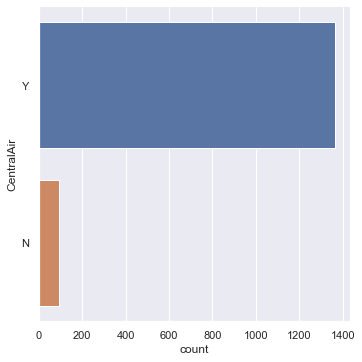

Ratio of classes:
Y    1365
N      95
Name: CentralAir, dtype: int64


In [3]:
sb.catplot(y = "CentralAir", data = houseData, kind = "count")
plt.show()
print("Ratio of classes:")
print(houseData["CentralAir"].value_counts())

The ratio is 1365 : 95. There is significantly more Y values than there are N values

### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

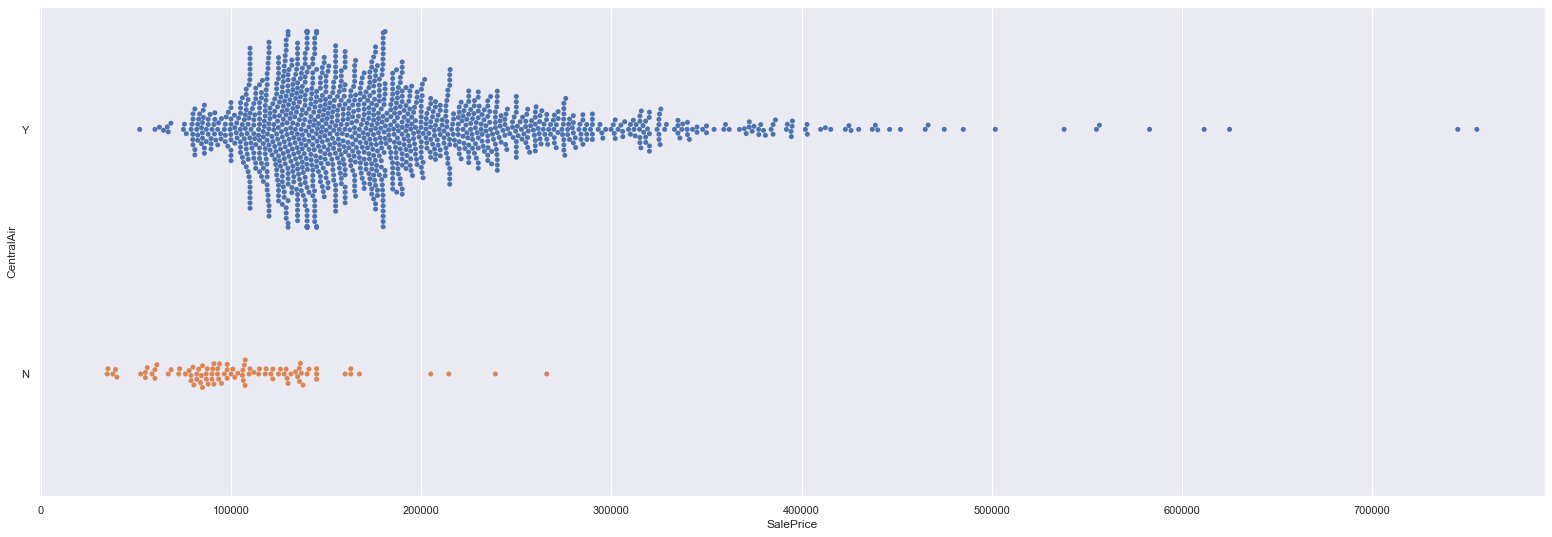

In [4]:
sale = pd.DataFrame(houseData["SalePrice"])
CAdata = pd.DataFrame(houseData["CentralAir"])
tempDF = pd.concat([sale, CAdata], axis = 1).reindex(sale.index)

f = plt.figure(figsize=(27, 9))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = tempDF, orient = "h")

Based on the bivarite boxplot, it seems possible to use SalePrice to predict CentralAir accurately as there is little overlap between the points.

### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [6]:
trainData = houseData.sample(n=1100, random_state = 250)
testData = houseData.drop(trainData.index)

.sample() is used to randomly select 1100 rows for trainData, with a random seed of 250 to ensure that the same randomly selected rows are selected every time this code is used.

testData is obtained by using houseData and dropping the rows in trainData.

### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [7]:
CAtrain = pd.DataFrame(trainData["CentralAir"])
Saletrain = pd.DataFrame(trainData["SalePrice"])

CAtest = pd.DataFrame(testData["CentralAir"])
Saletest = pd.DataFrame(testData["SalePrice"])

Creating individual dataframes for use.

In [8]:
dectree = DecisionTreeClassifier(max_depth = 6)
dectree.fit(Saletrain, CAtrain)

DecisionTreeClassifier(max_depth=6)

### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

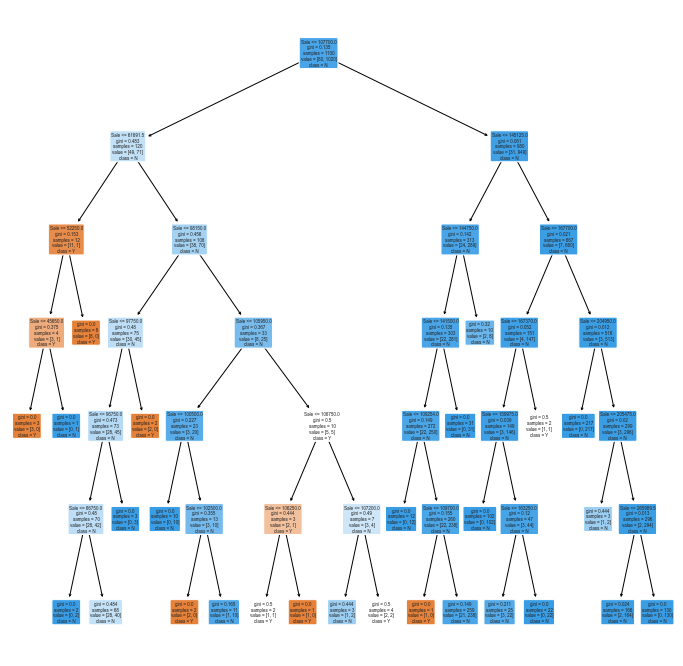

In [9]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["Sale"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

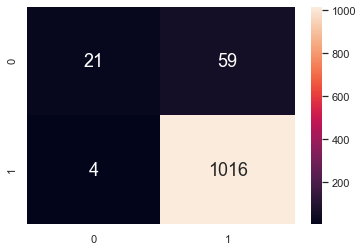

In [10]:
CA_train_pred = dectree.predict(Saletrain)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(CAtrain, CA_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})


By observation of the confusion matrix, it seems that the classification accuracy is relatively high.

Similarly, the false positive rate should be around 0.75 as the number of false positive is about 3 times that of the true negatives.

The false negative rate should be very low as the number of false negative are much lower than that of true positives.

### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [11]:
#For storing values for qn 3.
trainAccuracy = {}
trainTPR = {}
trainTNR = {}
trainFPR = {}
trainFNR = {}

testAccuracy = {}
testTPR = {}
testTNR = {}
testFPR = {}
testFNR = {}

print("Train Classification Accuracy \t:", dectree.score(Saletrain, CAtrain))
print("Train True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Train True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Train False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Train False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

trainAccuracy["SalePrice"] = dectree.score(Saletrain, CAtrain)
trainTPR["SalePrice"] = cm[1][1] / (cm[1][0] + cm[1][1])
trainTNR["SalePrice"] = cm[0][0] / (cm[0][0] + cm[0][1])
trainFPR["SalePrice"] =  cm[0][1] / (cm[0][0] + cm[0][1])
trainFNR["SalePrice"] = cm[1][0] / (cm[1][0] + cm[1][1])

Train Classification Accuracy 	: 0.9427272727272727
Train True Positive Rate 	: 0.996078431372549
Train True Negative Rate 	: 0.2625
Train False Positive Rate 	: 0.7375
Train False Negative Rate 	: 0.00392156862745098


The numerical evidence further reinforces my obervations stated before.

### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

In [12]:
dectree.fit(Saletest, CAtest)

DecisionTreeClassifier(max_depth=6)

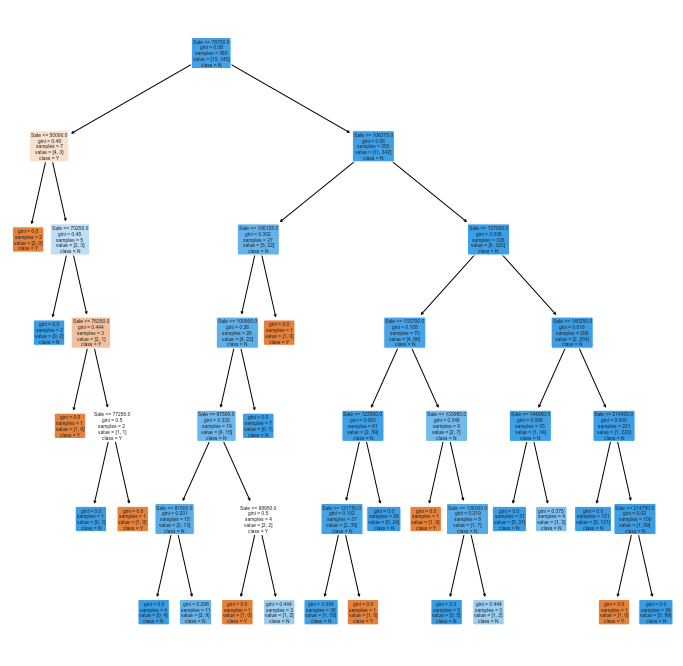

In [13]:
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["Sale"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

<AxesSubplot:>

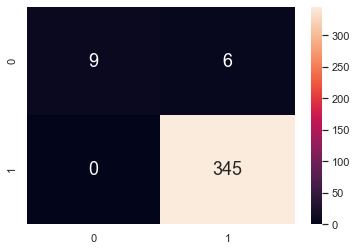

In [14]:
CA_test_pred = dectree.predict(Saletest)
cm = confusion_matrix(CAtest, CA_test_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy is relatively high.

The false positive rate should be around 0.4

The false negative rate is 0.

In [21]:
for i in indexes:
    CAtestCopy = CAtestCopy.drop(i)
    
CAtestCopy

,index,CentralAir
0,3,Y
1,4,Y
2,9,Y
3,14,Y
4,16,Y
...,...,...
355,1435,Y
356,1436,Y
357,1445,Y
358,1446,Y


In [22]:
CAtestCopy.set_index("index")

,CentralAir
index,
3,Y
4,Y
9,Y
14,Y
16,Y
...,...
1435,Y
1436,Y
1445,Y


### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [18]:
print("Test Classification Accuracy \t:", dectree.score(Saletest, CAtest))
print("Test True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Test True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Test False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Test False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

testAccuracy["SalePrice"] = dectree.score(Saletest, CAtest)
testTPR["SalePrice"] = cm[1][1] / (cm[1][0] + cm[1][1])
testTNR["SalePrice"] = cm[0][0] / (cm[0][0] + cm[0][1])
testFPR["SalePrice"] =  cm[0][1] / (cm[0][0] + cm[0][1])
testFNR["SalePrice"] = cm[1][0] / (cm[1][0] + cm[1][1])

Test Classification Accuracy 	: 0.9833333333333333
Test True Positive Rate 	: 1.0
Test True Negative Rate 	: 0.6
Test False Positive Rate 	: 0.4
Test False Negative Rate 	: 0.0


The numerical evidence further reinforces my obervations stated before.

## Problem 2: Predicting CentralAir using Other Variables

### GrLivArea

KeyboardInterrupt: 

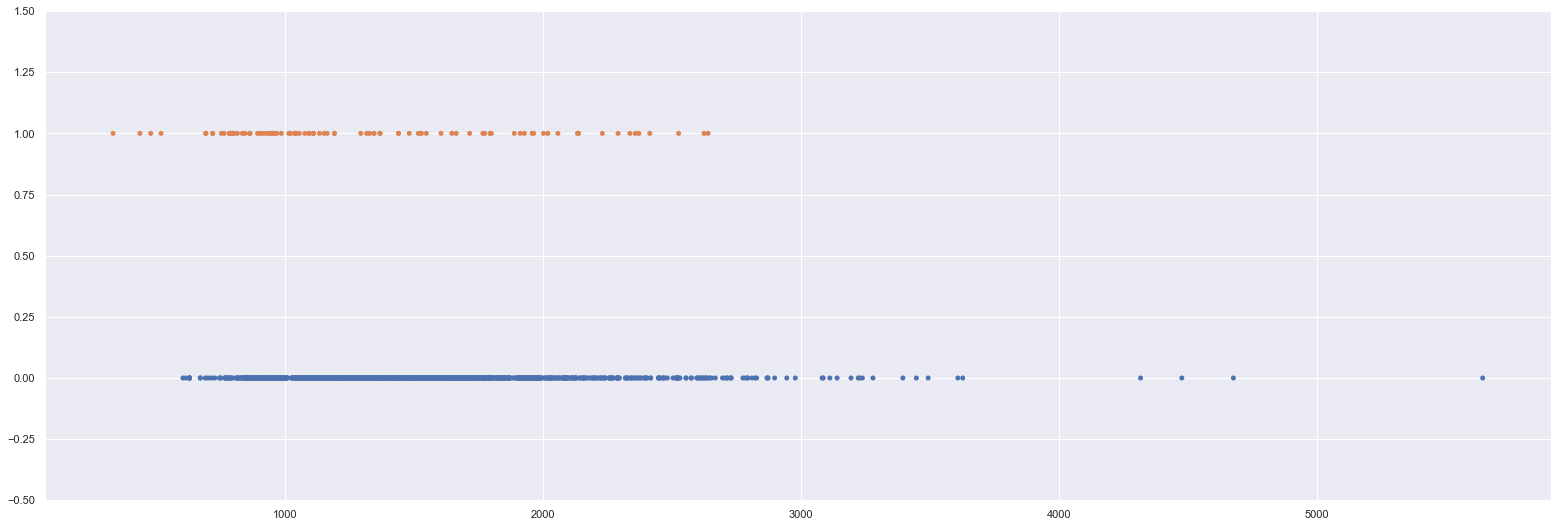

In [19]:
#b)
GrLiv = pd.DataFrame(houseData["GrLivArea"])
tempDF = pd.concat([GrLiv, CAdata], axis = 1).reindex(GrLiv.index)

f = plt.figure(figsize=(27, 9))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = tempDF, orient = "h")

By observation, GrLivArea does not look like a good predictor of CentralAir as both to have a lot of overlapping points.

In [ ]:
#e)
GrLivAreatrain = pd.DataFrame(trainData["GrLivArea"])

GrLivAreatest = pd.DataFrame(testData["GrLivArea"])

Creating a train and test dataframe for GrLivArea for use later on.

In [ ]:
#f)
f = plt.figure(figsize=(12,12))
dectree.fit(GrLivAreatrain, CAtrain)
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["GrLivArea"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
#g)
CA_train_pred = dectree.predict(GrLivAreatrain)
cm = confusion_matrix(CAtrain, CA_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy is relatively high.

The false positive rate quite high as there is about 4 times the number of false positive as compared to true negatives.

However, false negative rate is quite low as there is a lot more true positives than there are false negatives.

In [ ]:
#h)
print("Train Classification Accuracy \t:", dectree.score(GrLivAreatrain, CAtrain))
print("Train True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Train True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Train False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Train False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

trainAccuracy["GrLivArea"] = dectree.score(GrLivAreatrain, CAtrain)
trainTPR["GrLivArea"] = cm[1][1] / (cm[1][0] + cm[1][1])
trainTNR["GrLivArea"] = cm[0][0] / (cm[0][0] + cm[0][1])
trainFPR["GrLivArea"] =  cm[0][1] / (cm[0][0] + cm[0][1])
trainFNR["GrLivArea"] = cm[1][0] / (cm[1][0] + cm[1][1])

The numerical evidence further reinforces my obervations stated before.

In [ ]:
#i)
dectree.fit(GrLivAreatest, CAtest)
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["GrLivArea"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
CA_test_pred = dectree.predict(GrLivAreatest)

cm = confusion_matrix(CAtest, CA_test_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy relatively high.

The false positive rate should be about 0.67 as there are 2 times the number of false positives than there are true negatives.

However, false negative rate is quite low as there is a lot more true positives than there are false negatives.

In [ ]:
print("Test Classification Accuracy \t:", dectree.score(GrLivAreatest, CAtest))
print("Test True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Test True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Test False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Test False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

testAccuracy["GrLivArea"] = dectree.score(GrLivAreatest, CAtest)
testTPR["GrLivArea"] = cm[1][1] / (cm[1][0] + cm[1][1])
testTNR["GrLivArea"] = cm[0][0] / (cm[0][0] + cm[0][1])
testFPR["GrLivArea"] =  cm[0][1] / (cm[0][0] + cm[0][1])
testFNR["GrLivArea"] = cm[1][0] / (cm[1][0] + cm[1][1])

### OverallQual

In [ ]:
#b) 
OverallQualtemp = pd.DataFrame(houseData["OverallQual"])
tempDF = pd.concat([OverallQualtemp, CAdata], axis = 1).reindex(OverallQualtemp.index)

f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "OverallQual", y = "CentralAir", data = tempDF, orient = "h")

By observation, OverallQual does not seem like a very good predictor to predict CentralAir as there is a relatively large overlaps.

In [ ]:
#e)
OverallQualtrain = pd.DataFrame(trainData["OverallQual"])

OverallQualtest = pd.DataFrame(testData["OverallQual"])

Obtaining train and test dataframes for OverallQual to use for later.

In [ ]:
#f)
dectree.fit(OverallQualtrain, CAtrain)
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["OverallQual"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
#g)
CA_train_pred = dectree.predict(OverallQualtrain)
cm = confusion_matrix(CAtrain, CA_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy relatively high.

The false positive rate should be relatively high as there are about 5x more false positives than there are true negatives.

However, false negative rate is quite low as there is a lot more true positives than there are false negatives.

In [ ]:
#h)
print("Train Classification Accuracy \t:", dectree.score(OverallQualtrain, CAtrain))
print("Train True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Train True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Train False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Train False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

trainAccuracy["OverallQual"] = dectree.score(OverallQualtrain, CAtrain)
trainTPR["OverallQual"] = cm[1][1] / (cm[1][0] + cm[1][1])
trainTNR["OverallQual"] = cm[0][0] / (cm[0][0] + cm[0][1])
trainFPR["OverallQual"] =  cm[0][1] / (cm[0][0] + cm[0][1])
trainFNR["OverallQual"] = cm[1][0] / (cm[1][0] + cm[1][1])

The numerical evidence further reinforces my obervations stated before.

In [ ]:
#i)
dectree.fit(OverallQualtest, CAtest)
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["OverallQual"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
CA_test_pred = dectree.predict(OverallQualtest)
cm = confusion_matrix(CAtest, CA_test_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy relatively high.

The false positive rate will be quite high as there a lot more false positives than there are true negatives.

However, false negative rate is 0 as there are no false negatives.

In [ ]:
#j)
print("Test Classification Accuracy \t:", dectree.score(OverallQualtest, CAtest))
print("Test True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Test True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Test False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Test False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

testAccuracy["OverallQual"] = dectree.score(OverallQualtest, CAtest)
testTPR["OverallQual"] = cm[1][1] / (cm[1][0] + cm[1][1])
testTNR["OverallQual"] = cm[0][0] / (cm[0][0] + cm[0][1])
testFPR["OverallQual"] =  cm[0][1] / (cm[0][0] + cm[0][1])
testFNR["OverallQual"] = cm[1][0] / (cm[1][0] + cm[1][1])

### YearBuilt

In [ ]:
#b) 
YearBuilttemp = pd.DataFrame(houseData["YearBuilt"])
tempDF = pd.concat([YearBuilttemp, CAdata], axis = 1).reindex(YearBuilttemp.index)

f = plt.figure(figsize=(36, 12))
sb.swarmplot(x = "YearBuilt", y = "CentralAir", data = tempDF, orient = "h")

By observation, GrLivArea does not look like a very good predictor of CentralAir as both to have a lot of overlapping points.

In [ ]:
#e)
YearBuilttrain = pd.DataFrame(trainData["YearBuilt"])

YearBuilttest = pd.DataFrame(testData["YearBuilt"])

Obtaining train and test datasets for YearBuilt to use later on.

In [ ]:
#f)
dectree.fit(YearBuilttrain, CAtrain)
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["YearBuilt"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
#g)
CA_train_pred = dectree.predict(YearBuilttrain)
cm = confusion_matrix(CAtrain, CA_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy relatively high.

The false positive rate will be quite high as there a lot more false positives than there are true negatives.

However, false negative rate is quite low as there are more true positives than there are false negatives.

In [ ]:
#h)
print("Train Classification Accuracy \t:", dectree.score(YearBuilttrain, CAtrain))
print("Train True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Train True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Train False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Train False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

trainAccuracy["YearBuilt"] = dectree.score(YearBuilttrain, CAtrain)
trainTPR["YearBuilt"] = cm[1][1] / (cm[1][0] + cm[1][1])
trainTNR["YearBuilt"] = cm[0][0] / (cm[0][0] + cm[0][1])
trainFPR["YearBuilt"] =  cm[0][1] / (cm[0][0] + cm[0][1])
trainFNR["YearBuilt"] = cm[1][0] / (cm[1][0] + cm[1][1])

In [ ]:
#i)
dectree.fit(YearBuilttest, CAtest)
f = plt.figure(figsize=(12,12))
tree = plot_tree(dectree, filled=True, rounded=True, feature_names=["YearBuilt"], class_names=["Y","N"])

for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [ ]:
CA_test_pred = dectree.predict(YearBuilttest)

cm = confusion_matrix(CAtest, CA_test_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

By observation of the confusion matrix, it seems that the classification accuracy relatively high.

The false positive rate will be about 0.67 as there are 2x the number of false positives than there are true negatives.

However, false negative rate is much lower as there is much more true positives than there are false negatives.

In [ ]:
#j)
print("Test Classification Accuracy \t:", dectree.score(YearBuilttest, CAtest))
print("Test True Positive Rate \t:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("Test True Negative Rate \t:", cm[0][0] / (cm[0][0] + cm[0][1]))
print("Test False Positive Rate \t:", cm[0][1] / (cm[0][0] + cm[0][1]))
print("Test False Negative Rate \t:", cm[1][0] / (cm[1][0] + cm[1][1]))

testAccuracy["YearBuilt"] = dectree.score(YearBuilttest, CAtest)
testTPR["YearBuilt"] = cm[1][1] / (cm[1][0] + cm[1][1])
testTNR["YearBuilt"] = cm[0][0] / (cm[0][0] + cm[0][1])
testFPR["YearBuilt"] =  cm[0][1] / (cm[0][0] + cm[0][1])
testFNR["YearBuilt"] = cm[1][0] / (cm[1][0] + cm[1][1])

## Problem 3 : Best Uni-Variate Model to Predict CentralAir

In [ ]:
print("\t \t \tTrain Data")
print("\nSalePrice:")
print("Train Classification Accuracy \t:", trainAccuracy["SalePrice"])
print("Train True Positive Rate \t:", trainTPR["SalePrice"])
print("Train True Negative Rate \t:", trainTNR["SalePrice"])
print("Train False Positive Rate \t:", trainFPR["SalePrice"])
print("Train False Negative Rate \t:", trainFNR["SalePrice"])

print("\nGrLivArea:")
print("Train Classification Accuracy \t:", trainAccuracy["GrLivArea"])
print("Train True Positive Rate \t:", trainTPR["GrLivArea"])
print("Train True Negative Rate \t:", trainTNR["GrLivArea"])
print("Train False Positive Rate \t:", trainFPR["GrLivArea"])
print("Train False Negative Rate \t:", trainFNR["GrLivArea"])

print("\nOverallQual:")
print("Train Classification Accuracy \t:", trainAccuracy["OverallQual"])
print("Train True Positive Rate \t:", trainTPR["OverallQual"])
print("Train True Negative Rate \t:", trainTNR["OverallQual"])
print("Train False Positive Rate \t:", trainFPR["OverallQual"])
print("Train False Negative Rate \t:", trainFNR["OverallQual"])

print("\nYearBuilt:")
print("Train Classification Accuracy \t:", trainAccuracy["YearBuilt"])
print("Train True Positive Rate \t:", trainTPR["YearBuilt"])
print("Train True Negative Rate \t:", trainTNR["YearBuilt"])
print("Train False Positive Rate \t:", trainFPR["YearBuilt"])
print("Train False Negative Rate \t:", trainFNR["YearBuilt"])

print("\n \n \t \t \tTest Data")
print("\nSalePrice:")
print("Test Classification Accuracy \t:", testAccuracy["SalePrice"])
print("Test True Positive Rate \t:", testTPR["SalePrice"])
print("Test True Negative Rate \t:", testTNR["SalePrice"])
print("Test False Positive Rate \t:", testFPR["SalePrice"])
print("Test False Negative Rate \t:", testFNR["SalePrice"])

print("\nGrLivArea:")
print("Test Classification Accuracy \t:", testAccuracy["GrLivArea"])
print("Test True Positive Rate \t:", testTPR["GrLivArea"])
print("Test True Negative Rate \t:", testTNR["GrLivArea"])
print("Test False Positive Rate \t:", testFPR["GrLivArea"])
print("Test False Negative Rate \t:", testFNR["GrLivArea"])

print("\nOverallQual:")
print("Test Classification Accuracy \t:", testAccuracy["OverallQual"])
print("Test True Positive Rate \t:", testTPR["OverallQual"])
print("Test True Negative Rate \t:", testTNR["OverallQual"])
print("Test False Positive Rate \t:", testFPR["OverallQual"])
print("Test False Negative Rate \t:", testFNR["OverallQual"])

print("\nYearBuilt:")
print("Test Classification Accuracy \t:", testAccuracy["YearBuilt"])
print("Test True Positive Rate \t:", testTPR["YearBuilt"])
print("Test True Negative Rate \t:", testTNR["YearBuilt"])
print("Test False Positive Rate \t:", testFPR["YearBuilt"])
print("Test False Negative Rate \t:", testFNR["YearBuilt"])

A good predictor should have a high classification accuracy, true positive rate and true negative rate.

Based on the result I have obtained, SalePrice has the highest classification accuracy, true positive rate as well as the highest true negative rates for both TrainData and TestData.

Hence, I conclude that the classification tree modeled by with SalePrice is the best univariate classification tree to predict CentraAir.